In [1]:

#Load Libraries,
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as skl

In [2]:
#Load data
df = pd.read_csv (r'C:\Users\14372\Documents\PythonData1200\swiss1.csv')
df.head()



,Location,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
#Drop Location
df2=df.drop('Location',axis=1)
df2.head()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6


In [4]:
#Key Statistics
df2.describe()

,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [5]:
#Overview of DF2 info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fertility        47 non-null     float64
 1   Agriculture      47 non-null     float64
 2   Examination      47 non-null     int64  
 3   Education        47 non-null     int64  
 4   Catholic         47 non-null     float64
 5   InfantMortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.3 KB


In [6]:
#Tukey Method

# Import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

Outliers_to_drop = detect_outliers(df2.drop('Fertility',axis=1),0,list(df2.drop('Fertility',axis=1)))
df2.drop('Fertility',axis=1).loc[Outliers_to_drop]

,Agriculture,Examination,Education,Catholic,InfantMortality
17,19.4,26,28,12.11,20.2
41,17.6,35,32,16.92,23.0
44,1.2,37,53,42.34,18.0
45,46.6,16,29,50.43,18.2
46,27.7,22,29,58.33,19.3
18,15.2,31,20,2.15,10.8


In [7]:
#Create New Dataset without Outliers
No_Outliers_data = df2.drop(df2.index[Outliers_to_drop]).reset_index(drop = True)
No_Outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fertility        41 non-null     float64
 1   Agriculture      41 non-null     float64
 2   Examination      41 non-null     int64  
 3   Education        41 non-null     int64  
 4   Catholic         41 non-null     float64
 5   InfantMortality  41 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.0 KB


In [8]:
#Create Standard Model

#Define x and y variable
x = No_Outliers_data.drop('Fertility',axis=1).to_numpy()
y = No_Outliers_data['Fertility'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
alpha=0.5

In [9]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

pipe_lasso= Pipeline([('scl', StandardScaler()),
                     ('clf', Lasso(alpha=alpha,tol=1,random_state=100))])
pipeline.insert(1,pipe_lasso)

pipe_ridge= Pipeline([('scl', StandardScaler()),
                     ('clf', Ridge(alpha=alpha,tol=1,random_state=100))])
pipeline.insert(2,pipe_ridge)

pipe_elas= Pipeline([('scl', StandardScaler()),
                     ('clf', ElasticNet(alpha=alpha,tol=1,random_state=100))])
pipeline.insert(3,pipe_elas)

# Set grid search params 

modelpara =[]

param_gridlm = {'clf__fit_intercept':[True,False],
             'clf__normalize':[True,False], 
             'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridlm)

param_gridlasso = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(1,param_gridlasso)

param_gridridge = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(2,param_gridridge)

param_gridelas = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(3,param_gridelas)

In [10]:
#Create Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_root_mean_squared_error',
                                                            cv=10,random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([-1,10])
    plt.show()

Learning Curve - LM


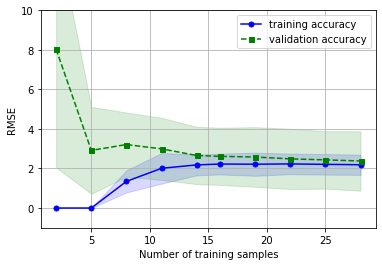

Learning Curve - Lasso


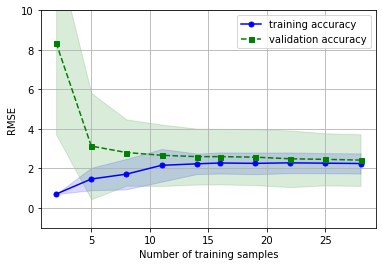

Learning Curve - Ridge


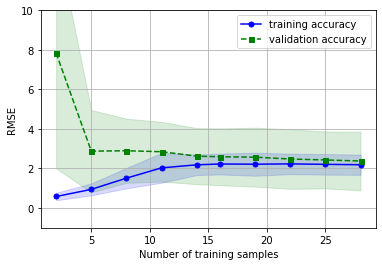

Learning Curve - ElasticNet


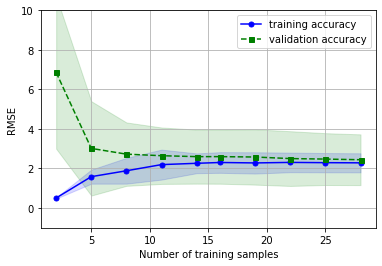

In [11]:
#Plot Learning Curve

print('Learning Curve - LM')
plot_learning_curves(pipe_lm)
print('Learning Curve - Lasso')
plot_learning_curves(pipe_lasso)
print('Learning Curve - Ridge')
plot_learning_curves(pipe_ridge)
print('Learning Curve - ElasticNet')
plot_learning_curves(pipe_elas)

Model Evaluation - RMSE
LinearRegression 2.59
Lasso 2.58
Ridge 2.58
ElasticNet 2.59




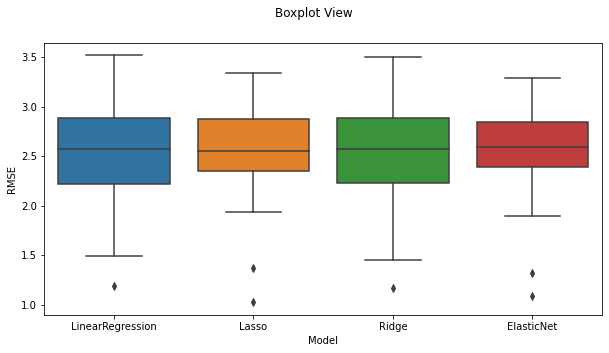

In [12]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LinearRegression',pipe_lm))
models.append(('Lasso',pipe_lasso))
models.append(('Ridge',pipe_ridge))
models.append(('ElasticNet',pipe_elas))
  
#Model Evaluation
results =[]
names=[]
scoring ='neg_root_mean_squared_error'
print('Model Evaluation - RMSE')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

#Boxplot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [13]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='neg_root_mean_squared_error')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    print('\nModel coefficients: ')   
    for name, score in zip(list(No_Outliers_data.drop('Fertility',axis=1)),
                           gs_clf.best_estimator_.named_steps['clf'].coef_):
         print(name, round(score,2)) 
    
    #Print R2
    print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test,y_pred)))
    
    #Print MSE and RMSE
    print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))  
    print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 

In [14]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearRegression()

Best Parameters: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': True}

Intercept: 73.59

Model coefficients: 
Agriculture -4.31
Examination -2.75
Education -1.75
Catholic 4.24
InfantMortality 3.05

R2: 0.17
Mean Absolute Error: 8.80
Mean Squared Error: 109.26
Root Mean Squared Error: 10.45

Optimized Model

Model Name: Lasso(alpha=0.5, random_state=100, tol=1)

Best Parameters: {'clf__alpha': 0.1}

Intercept: 73.59

Model coefficients: 
Agriculture -2.98
Examination -4.67
Education -0.11
Catholic 2.69
InfantMortality 3.49

R2: 0.34
Mean Absolute Error: 7.07
Mean Squared Error: 87.04
Root Mean Squared Error: 9.33

Optimized Model

Model Name: Ridge(alpha=0.5, random_state=100, tol=1)

Best Parameters: {'clf__alpha': 1}

Intercept: 73.59

Model coefficients: 
Agriculture -4.02
Examination -2.79
Education -1.55
Catholic 4.03
InfantMortality 3.03

R2: 0.21
Mean Absolute Error: 8.58
Mean Squared Error: 104.46
Root Mean S